# Final Project



Louisville is an awesome city for many reasons: it offers so many food and entertainment options, is a short drive to visit many other cities, and is known for its reasonable cost of living.

However, lower cost of living can also lead to lower wages. 

To understand basic compensation characteristics of the local workforce, we will use pubically available data to explore the demographics of the Kentucky workforce, compare these demographics to the National level, then go into greater detail by exploring regional differences in Kentucky.


## SECTION 1 

To get started, read in the Kentucky workforce data set called 2021_StatewideOccupationalEmploymentAndWages.xlsx (this data was pulled from KYStats (https://kystats.ky.gov/KYLMI/OEWSWage).

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
s1 = pd.read_excel('2021_StatewideOccupationalEmploymentAndWages.xlsx') #read file

In the Labor field, there is a standard method of classifying occupations called 'SOC codes'. These codes are structured so that the first two digits reflect the type of occupation and the last 4 digits reflect more specific details about the occupation. Numeric SOC codes have corresponding string titles. For our purposes, the string titles will be helpful for visualization and grouping purposes. For that reason, set the index to the 'Standard Occupational Classification (SOC) Title'

In [113]:
s = s1.set_index('Standard Occupational Classification (SOC) Title') #set index to SOC Title

Within the data set are several rows that belong to broad categories of occupations. These SOC codes end with -0000 as the final 5 characters. Throughout this final, there will be times where it will be appropriate to use the broad categories and times where we will want the specific occupations, but generally not both. To move forward, split the data set into two data set, one with the broad categories, one with all but the broad categories, using the SOC codes variable.

In [114]:
broad = s[s['SOC Code'].str.contains('-0000')]
rest = s[~s['SOC Code'].str.contains('-0000')] 
#dividing the data using -0000 as a string which contains them and doesn't contain them

### FOR THE REMAINDER OF THIS SECTION USE BROAD OCCUPATION CATEGORIES

Create a barplot to visualize the Entry Annual Salary by occupation in descending order

<AxesSubplot:xlabel='Entry Annual', ylabel='Standard Occupational Classification (SOC) Title'>

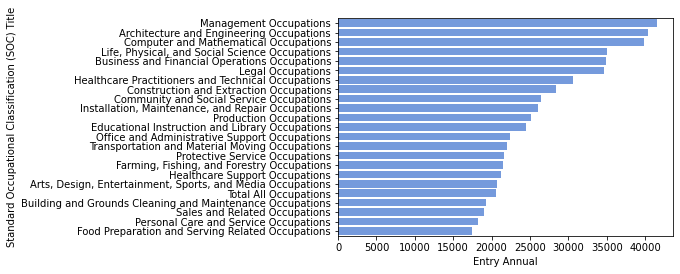

In [115]:
entry = broad.sort_values('Entry Annual', ascending = False)
sns.barplot(y=entry.index, x= entry["Entry Annual"], color = 'cornflowerblue') 
#barplot after sorting the 'Entry Annual' in descending order

Create a barplot to visualize the Experienced Annual Salary by occupation in descending order

<AxesSubplot:xlabel='Experienced Annual', ylabel='Standard Occupational Classification (SOC) Title'>

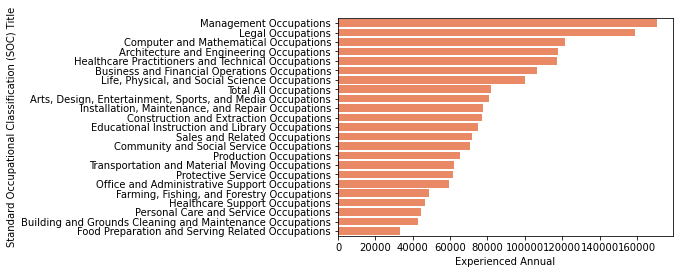

In [116]:
Experienced = broad.sort_values("Experienced Annual", ascending=False)
sns.barplot(y=Experienced.index, x= Experienced["Experienced Annual"], color = 'coral')
#barplot after sorting the "Experienced Annual" in descending order

Create a new variable called 'Salary Growth Potential' that calculates the potential salary growth as a percentage of Entry Annual Salary ((Experienced-Entry)/Entry). Create a barplot to display the salary growth potential in descending order.

<AxesSubplot:xlabel='Salary_Growth_Potential', ylabel='Standard Occupational Classification (SOC) Title'>

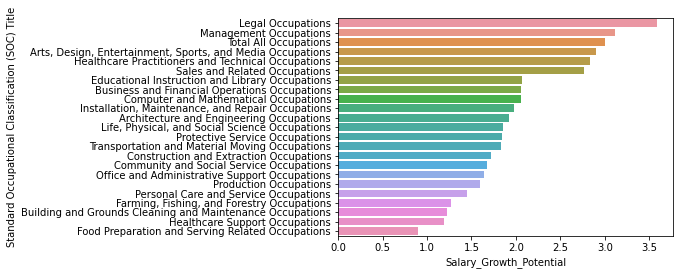

In [117]:
b_rev = broad.assign(Salary_Growth_Potential = ((broad['Experienced Annual']-broad['Entry Annual']) / broad['Entry Annual']))
#calculating 'Salary_Growth_Potential' in broad regions
b_sort = b_rev.sort_values('Salary_Growth_Potential', ascending = False) #sort values in descending order
sns.barplot(y=b_sort.index, x= b_sort["Salary_Growth_Potential"])
#barplot after sorting the "Salary_Growth_Potential" in descending order

## SECTION 2 

### FOR THE SECTION TASK USE DETAILED OCCUPATION CATEGORIES

#### Repeat the following using only Protective Service Occupations (SOC codes begin with 33)
Create a barplot to visualize the highest Entry Annual Salary
Create a barplot to visualize the highest Experienced Annual Salary
Create a new variable called 'Salary Growth Potential' that calculates the potential salary growth as a percentage of Entry Annual Salary ((Experienced-Entry)/Entry)

In [118]:
sec2 = s[s['SOC Code'].str.contains('33-')] #occupations that contain 33- as SOC Code

<AxesSubplot:xlabel='Entry Annual', ylabel='Standard Occupational Classification (SOC) Title'>

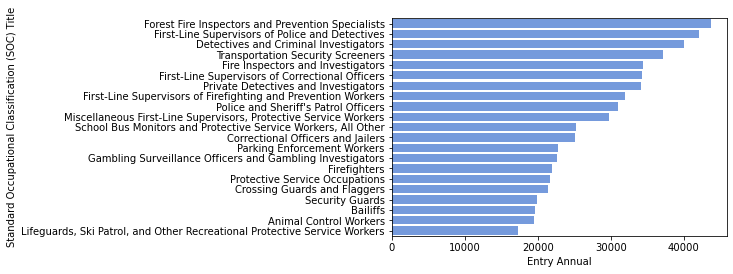

In [119]:
en_s2 = sec2.sort_values('Entry Annual', ascending = False)
sns.barplot(y=en_s2.index, x= en_s2["Entry Annual"], color = 'cornflowerblue')

<AxesSubplot:xlabel='Experienced Annual', ylabel='Standard Occupational Classification (SOC) Title'>

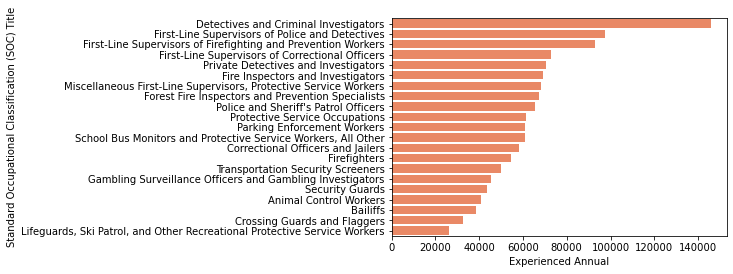

In [120]:
ex_s2 = sec2.sort_values("Experienced Annual", ascending=False)
sns.barplot(y=ex_s2.index, x= ex_s2["Experienced Annual"], color = 'coral')

<AxesSubplot:xlabel='Salary_Growth_Potential', ylabel='Standard Occupational Classification (SOC) Title'>

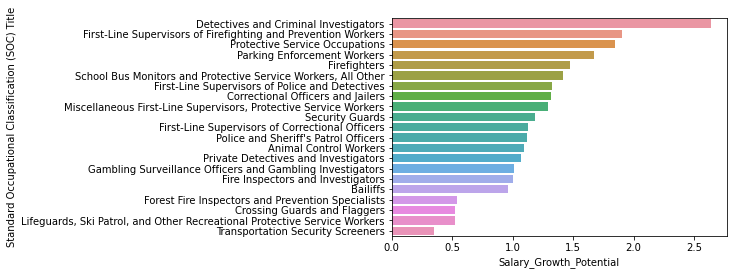

In [121]:
s2_rev = sec2.assign(Salary_Growth_Potential = ((sec2['Experienced Annual']-sec2['Entry Annual']) / sec2['Entry Annual']))
s2_sort = s2_rev.sort_values('Salary_Growth_Potential', ascending = False)
sns.barplot(y=s2_sort.index, x= s2_sort["Salary_Growth_Potential"])

## SECTION 3

### FOR THE NEXT SECTION USE DETAILED OCCUPATION CATEGORIES

In order to better understand how Kentucky compensation compares to National compensation, we will connect National data with Kentucky data.

Begin by reading in National Employment projections in the file called Employment Projections.xlsx (data was pulled from https://data.bls.gov/projections/occupationProj). Set index to 'Occupation Title'.

In [122]:
s2 = pd.read_excel('Employment Projections.xlsx') #national data
e = s2.set_index('Occupation Title') # set index to 'Occupation Title'

Merge State data with National data keeping all field present in State data. Use SOC codes as your merge key. Make sure the index is still Occupation titles

In [123]:
s2.rename(columns = {'Occupation Code':'SOC Code'}, inplace = True) 
#renamed the 'Occupation Code' to 'SOC Code' to join the with state data

In [124]:
data = pd.merge(s1, s2, on = 'SOC Code', how = 'left') #merged the data using left join to meet the requirements 
df = data.set_index('Occupation Title')

To start investigating whether the lower cost of living in Kentucky is reflected in compensation, create a new variable that calculates the what percent of the national median annual wage in 2020 the median annual Kentucky Salary is.

In [125]:
df['per'] = (df['Median Annual ']/df['Median Annual Wage 2020']) * 100
#calculated the percentage of the national median annual wage
sec3 = df.sort_values('per', ascending = False) #sort values
per3 = sec3.head(10)

Plot the 10 highest % and the 10 lowest %

<AxesSubplot:xlabel='per', ylabel='Standard Occupational Classification (SOC) Title'>

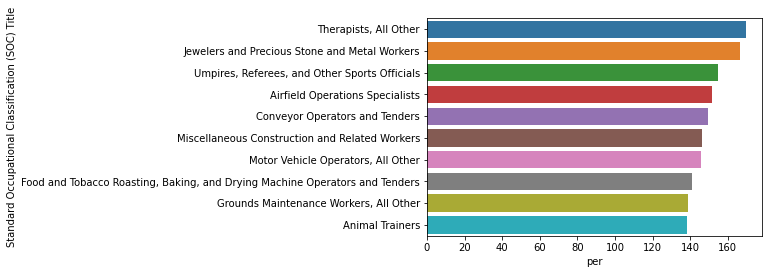

In [126]:
sns.barplot(y = per3['Standard Occupational Classification (SOC) Title'], x = per3['per'])

<AxesSubplot:xlabel='per', ylabel='Standard Occupational Classification (SOC) Title'>

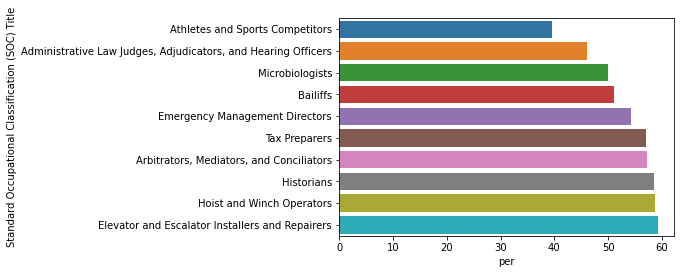

In [127]:
sec33 = df.sort_values('per', ascending = True)
per33 = sec33.head(10)
sns.barplot(y = per33['Standard Occupational Classification (SOC) Title'], x = per33['per'])

Get the average % 

In [128]:
df['per'].mean() #mean of the percentage of the national median annual wage

91.78592258242537

## SECTION 4

Kentucky is a very large and diverse state. Comparing Kentucky as a whole to National data can be informative, but to fully understand compensation structures, it is better to consider the possibility of regional differences.

Read in regional occupation data in the file called 2021_LWAOccupationalEmploymentAndWages_OneSheet.xlsx (data pulled and compiled from https://kystats.ky.gov/KYLMI/OEWSWage)

In [129]:
s4 = pd.read_excel('2021_LWAOccupationalEmploymentAndWages_OneSheet.xlsx') #regional data

Merge the State and National dataframe you created in Part 2 with the regional data using SOC code as your merge key. Keep only the data contained in both data set. Make sure the index is the string titles associated with the SOC codes.

In [130]:
data4 = pd.merge(df, s4, on = 'SOC Code', how = 'inner') #merged the data using 'SOC Code' with inner join to meet Requirements 
df4 = data4.set_index('Standard Occupational Classification (SOC) Title_x')

Create two new variables by calculating the regional median annual salary percent of kentucky median annual salary AND the regional median annual salary percent of the national median annual salary.

In [131]:
df4['med_ann_sal_st'] = (df4['Median Annual _y'] / df4['Median Annual _x']) * 100
df4['med_ann_sal_nat'] = (df4['Median Annual _y'] / df4['Median Annual Wage 2020']) * 100

Create a pivot table to determine which region has the most occupations where the average regional percent of national salary is greater the the regional percent of KY salary.


In [132]:
great = df4.loc[(df4['med_ann_sal_nat'] > df4['med_ann_sal_st'])] #checking the condition
g5 = great.reset_index() #reset index
pivot4 = pd.pivot_table(data = g5, index = ['Region'], aggfunc = 'sum') 
#pivot table to get regions with most occupations
pivot4.sort_values('Occupational Openings, 2020-2030 Annual Average', ascending = False).head(1) 
#sort values and get the top Region

,25th Percentile Annual_x,25th Percentile Annual_y,25th Percentile Hourly_x,25th Percentile Hourly_y,75th Percentile Annual_x,75th Percentile Annual_y,75th Percentile Hourly_x,75th Percentile Hourly_y,Education Code,Employment 2020,...,Median Annual _x,Median Annual _y,Median Hourly_x,Median Hourly_y,"Occupational Openings, 2020-2030 Annual Average",Workex Code,med_ann_sal_nat,med_ann_sal_st,per,trCode
Region,,,,,,,,,,,,,,,,,,,,,
Kentuckiana Works,4297198.0,4407115.0,2043.35,2094.84,6565736.0,6926589.0,3098.38,3263.43,639.0,20343.0,...,5525511.0,5619622.0,2615.08,2654.81,2394.9,412.0,11909.609304,10858.496577,11630.862949,483.0


## SECTION 5

### USE THE SAME OCCUPATIONS YOU USED IN SECTION 2 TO COMPLETE SECTION 5 

Calculate the regional compensation growth potential for the occupations you used in Section 2. NOTE: YOU MAY RECEIVE AN ERROR IF THERE ARE MISSING DATA; CONTINUE WITH THAT ERROR

In [133]:
sec5 = s4[s4['SOC Code'].str.contains('33-')]
s5_rev = sec5.assign(Salary_Growth_Potential = ((sec5['Experienced Annual']-sec5['Entry Annual']) / sec5['Entry Annual']))
#caluculating "growth potential"
s5_sort = s5_rev.sort_values('Salary_Growth_Potential', ascending = False)

Plot a boxplot that shows the range of regional growth potential for each region

<AxesSubplot:xlabel='Salary_Growth_Potential', ylabel='Region'>

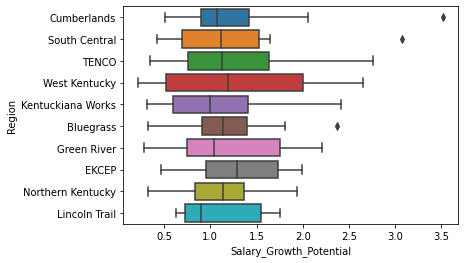

In [134]:
sns.boxplot(y=s5_sort['Region'], x= s5_sort["Salary_Growth_Potential"])

Create a pivot table to show the 4 regions with the highest regional growth potential for your occupation area

In [135]:
pivot5 = pd.pivot_table(data = s5_sort, index = ['Region'], values = 'Salary_Growth_Potential', aggfunc='sum')
p5 = pivot5.sort_values('Salary_Growth_Potential', ascending = False)
#created pivot table to get regions with highest regional growth potential 
p55 = p5.head(4).reset_index() #extract the top 4 data
p55

,Region,Salary_Growth_Potential
0,Bluegrass,19.738014
1,EKCEP,17.881658
2,Northern Kentucky,17.832027
3,Kentuckiana Works,17.650603


Using the results of the pivot table you just made, create a panel of bar charts displaying the regional growth potential in the top 4 regions by occupation (there should be 4 charts, each with regional grown potential on the y axis and occupation title on the x axis).

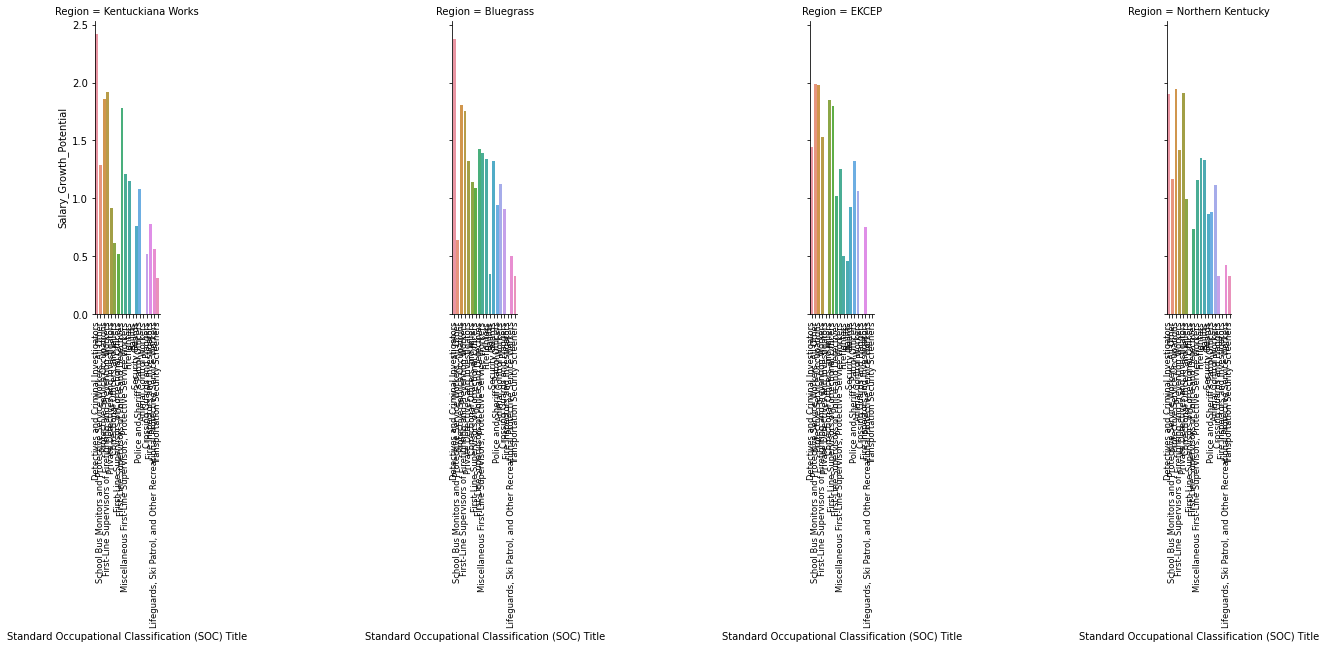

In [136]:
top4_reg = ["Bluegrass", "EKCEP", "Northern Kentucky", "Kentuckiana Works"] #assign top 4 regions to a variable
s5_reg = s5_sort[s5_sort['Region'].isin(top4_reg)].reset_index() #get the data using the top4 regions with isin
last = sns.catplot(y='Salary_Growth_Potential',x='Standard Occupational Classification (SOC) Title',
                   data=s5_reg, col='Region', kind = 'bar')  #catplot with the data of top4
last.set_xticklabels(fontsize=14, rotation = 90, ha='center', size = 'small')
plt.show()

## SECTION 6 

Using the data and figures you generated above, explain at least 3 findings you thought were interesting and at least 1 future direction for data analysis.

## There a couple of things that I found interesting from the data above

1. The region **"Kentuckiana Works"** have the highest **'Highest Estimated Employment' and Comparably 'Highest Annual Salaries'**.


2. **"Office and Administrative Support Occupations" and "Transportation and Material Moving Occupations"** have the **Highest Estimated Employment in both Kentucky state and the regional data**.


3. The three regions that provide Highest Employment for people are -
a) Kentuckiana Works
b) Bluegrass
c) Northern Kentucky

# Future direction

1. **"Fast food and counter workers" and "Home health and personal care aides" Occupations are likely to get more openings in the near future.**

2. **"Word processors and typists" occupations would likely face decrease in the Occupational openings and there would be drastic Employment Percent Change.**